In [1]:
!pip install imbalanced-learn scikit-learn pandas numpy matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load into DataFrame (modify filename accordingly)



Saving RT_IOT2022.csv to RT_IOT2022.csv


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\anime\\Downloads\\RT_IOT2022.csv'

In [4]:
df = pd.read_csv(r"RT_IOT2022.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

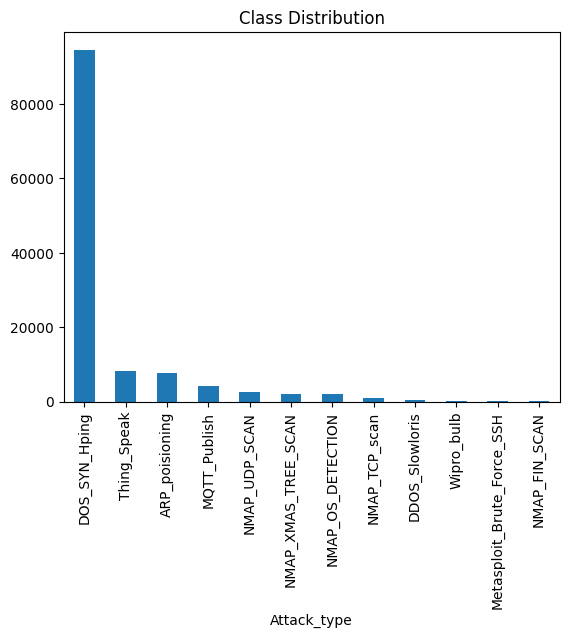

In [5]:
# Check dataset info
df.info()

# Display first few rows
df.head()

# Check class distribution
df["Attack_type"].value_counts().plot(kind="bar", title="Class Distribution")
plt.show()


In [6]:
# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

# Encode categorical features
label_encoders = {}
for col in ["proto", "service", "Attack_type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for future decoding

# Check missing values
print(df.isnull().sum().sum())  # Should be 0


0


In [7]:
# Define features and target
X = df.drop(columns=["Attack_type"])
y = df["Attack_type"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


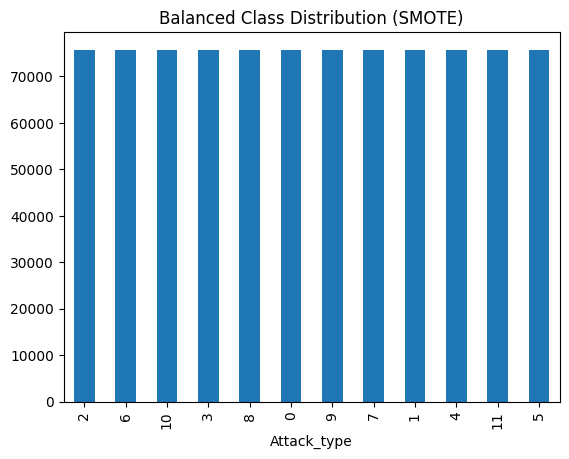

In [8]:
# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
pd.Series(y_train_resampled).value_counts().plot(kind="bar", title="Balanced Class Distribution (SMOTE)")
plt.show()


In [9]:
# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9987004548408057

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1550
           1       1.00      0.99      1.00       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.78      1.00      0.88         7
           5       0.83      0.83      0.83         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.99      0.99      0.99       518
           9       1.00      1.00      1.00       402
          10       0.99      0.99      0.99      1622
          11       0.98      0.98      0.98        51

    accuracy                           1.00     24624
   macro avg       0.96      0.98      0.97     24624
weighted avg       1.00      1.00      1.00     24624



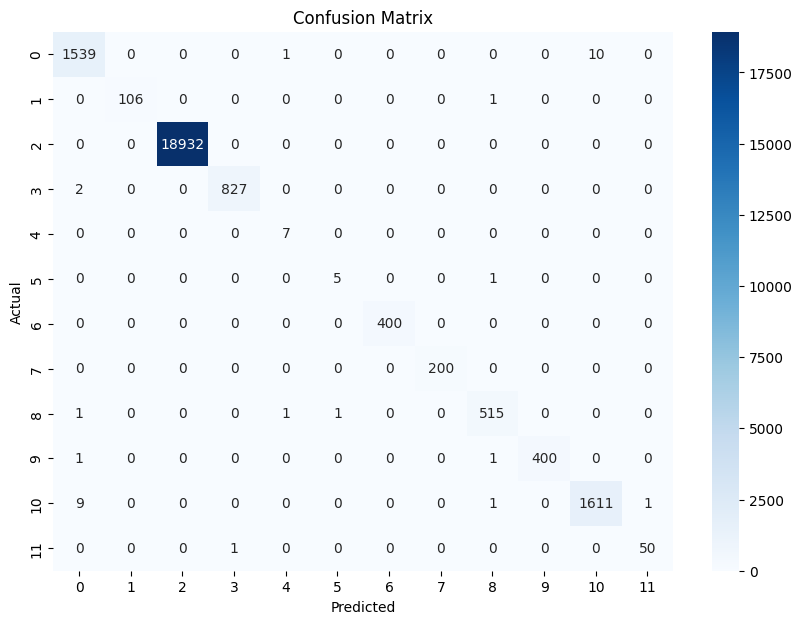

In [10]:
# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
